# Introduction

We are going to train a convolutional neural network (cnn) to recognize facial emotions. Then we use the output of the emotions to play a game in a browser which is like guitarhero. Instead of pressing the matching button at the right time, you can use your face and make the same emotion as needed. Our program then checks wheter you did a good job (same emotion) or if you weren't that clear with your facial emotion!


## Dataset

As a dataset, we use videos from 23 different actors who sing and say a sentence in eight different emotions. 
Our old approach was the following: We will seperate the videos into each emotion and then take several screenshots from the video.
Our new approach is to use a face landmark recognition api too feed our model with our data to train it on different emotions.


## Credits


Credits:
"[The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)](https://zenodo.org/record/1188976)" by Livingstone & Russo is licensed under [CC BY-NA-SC 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/)


---

In [1]:
import keras
keras.__version__

D:\Programme\Anaconda3\envs\tf\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


'2.2.4'

## Preparing the data

First of all we inport os, shutil and glob. glob is used to match path names.
We are going to copy every video into one folder


In [2]:
import os, shutil, glob
import numpy as np

In [3]:
with open("D:/Arbeit/semester5/comppx18/Projekt/Datasets/KaggleEmotion/fer2013/fer2013.csv") as f:
    content = f.readlines()

    lines = np.array(content)

    num_of_instances = lines.size
print("number of instances: ",num_of_instances)

number of instances:  35888


In [4]:
x_train, y_train, x_test, y_test = [], [], [], []
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")

        val = img.split(" ")
        pixels = np.array(val, 'float32')
        emotion = keras.utils.to_categorical(emotion, 7)
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("", end="")

In [5]:
y_train = np.array(y_train)
x_train = np.array(x_train)
y_test = np.array(y_test)
x_test = np.array(x_test)
x_train = x_train.reshape((len(x_train),48,48)+(1,))
x_test = x_test.reshape((len(x_test),48,48)+(1,))

In [6]:
#np.concatenate((np.ones((len(x_train),1), dtype=np.int), x_train.reshape(len(x_train),1)), axis=1)
#print(x_train.shape)
#x_train = np.insert(x_train, 0, values=30, axis=1) 
#print(x_train)
#print(x_train.shape)
print(x_train.shape)
#x_train = x_train.reshape((len(x_train), len(x_train[0])))
#x_train = x_train.astype('float32') / 255

(28709, 48, 48, 1)


In [7]:
from keras import layers
from keras import models
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dense
from keras.layers import Dropout

In [258]:
model = models.Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
model.add(layers.Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(7, activation='softmax'))

In [13]:
model = models.Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(layers.Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))
#------------------------------
#batch process
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=256)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

model.load_weights('facial_expression_model_weights.h5') #load weights

In [259]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
batch_size = 256
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
 
model.compile(loss='categorical_crossentropy'
, optimizer=keras.optimizers.Adam()
, metrics=['accuracy']
)
model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=1)

Epoch 1/1
 32/128 [======>.......................] - ETA: 33:40 - loss: 13.5400 - acc: 0.1343

KeyboardInterrupt: 

In [22]:
model.save("faceEmotionWithGivenWeights.h5")

In [3]:
model = keras.models.load_model("models/faceEmotionWithGivenWeights.h5")

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_9 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 128)         147584    
__________

In [ ]:
'''from sklearn.metrics import classification_report, confusion_matrix
pred_list = []; actual_list = []
for i in predictions:
pred_list.append(np.argmax(i))
for i in y_test:
actual_list.append(np.argmax(i))
confusion_matrix(actual_list, pred_list)
'''

In [4]:
import matplotlib.pyplot as plt
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

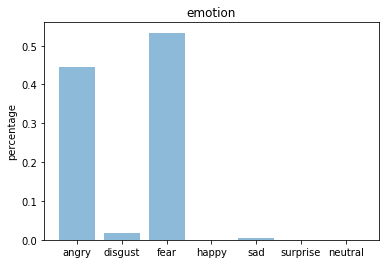

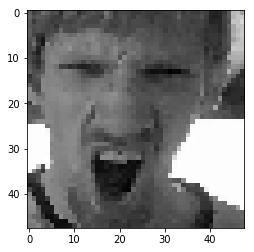

In [20]:
from keras.preprocessing import image
img = image.load_img("C:/Users/mike/Pictures/Camera Roll/old/a2.jpg", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom = model.predict(x)
emotion_analysis(custom[0])
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.gray()
plt.imshow(x)
plt.show()

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier('D:/Programme/Anaconda3/envs/compx/Library/etc/haarcascades/haarcascade_frontalface_default.xml')
img = cv2.imread('C:/Users/mike/Pictures/Camera Roll/sad4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow('img',img)